# Análisis de datos con pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
# activación de la cx prefrontal al escoger un helado
experimento = {
    "sujeto" : ["S01", "S02", "S03", "S02", "S01", "S01", "S02"],
    "sabor" : ["choco", "piñon", "queso", "chango", "choco", "queso", "angel"],
    "precio" : [45, 105, 30, 60, 85, 45, 120],
    "tamaño" : ["m", "g", "ch", "ch", "g", "m", "g"]
}

In [3]:
experimento

{'sujeto': ['S01', 'S02', 'S03', 'S02', 'S01', 'S01', 'S02'],
 'sabor': ['choco', 'piñon', 'queso', 'chango', 'choco', 'queso', 'angel'],
 'precio': [45, 105, 30, 60, 85, 45, 120],
 'tamaño': ['m', 'g', 'ch', 'ch', 'g', 'm', 'g']}

In [4]:
df = pd.DataFrame(experimento)
df

,sujeto,sabor,precio,tamaño
0,S01,choco,45,m
1,S02,piñon,105,g
2,S03,queso,30,ch
3,S02,chango,60,ch
4,S01,choco,85,g
5,S01,queso,45,m
6,S02,angel,120,g


In [5]:
df["activación"] = [True, True, False, False, True, True, False]

In [6]:
df

,sujeto,sabor,precio,tamaño,activación
0,S01,choco,45,m,True
1,S02,piñon,105,g,True
2,S03,queso,30,ch,False
3,S02,chango,60,ch,False
4,S01,choco,85,g,True
5,S01,queso,45,m,True
6,S02,angel,120,g,False


## agrupamiento de los datos 

In [7]:
# para seleccionar la columna sujeto
df["sujeto"], df.sujeto 

(0    S01
 1    S02
 2    S03
 3    S02
 4    S01
 5    S01
 6    S02
 Name: sujeto, dtype: object,
 0    S01
 1    S02
 2    S03
 3    S02
 4    S01
 5    S01
 6    S02
 Name: sujeto, dtype: object)

In [8]:
# filtrado del dataframe
df[df["precio"] > 100 ]

,sujeto,sabor,precio,tamaño,activación
1,S02,piñon,105,g,True
6,S02,angel,120,g,False


In [9]:
# filtrado para seleccionar a S01
df[df["sujeto"] == "S01"]

,sujeto,sabor,precio,tamaño,activación
0,S01,choco,45,m,True
4,S01,choco,85,g,True
5,S01,queso,45,m,True


In [10]:
# filtrado para seleccionar a S02
df[df["sujeto"] == "S02"]

,sujeto,sabor,precio,tamaño,activación
1,S02,piñon,105,g,True
3,S02,chango,60,ch,False
6,S02,angel,120,g,False


In [11]:
# filtrado para seleccionar a S03
df[df["sujeto"] == "S03"]

,sujeto,sabor,precio,tamaño,activación
2,S03,queso,30,ch,False


#### Para hacerlo de forma más automática --> .groupby

In [12]:
df.groupby(by = "sujeto")

In [13]:
df_por_sujeto = df.groupby(by = "sujeto")
df_por_sujeto.describe() # --> descripción estadística de nuestro dataframe

precio                                                       
        count       mean        std   min   25%    50%    75%    max
sujeto                                                              
S01       3.0  58.333333  23.094011  45.0  45.0   45.0   65.0   85.0
S02       3.0  95.000000  31.224990  60.0  82.5  105.0  112.5  120.0
S03       1.0  30.000000        NaN  30.0  30.0   30.0   30.0   30.0

In [14]:
df_por_sujeto.describe(include = "all") # variables tanto numéricas como las no numéricas

sabor                                                   ... activación  \
       count unique    top freq mean  std  min  25%  50%  75%  ...     unique   
sujeto                                                         ...              
S01        3      2  choco    2  NaN  NaN  NaN  NaN  NaN  NaN  ...          1   
S02        3      3  piñon    1  NaN  NaN  NaN  NaN  NaN  NaN  ...          2   
S03        1      1  queso    1  NaN  NaN  NaN  NaN  NaN  NaN  ...          1   

                                                       
          top freq mean  std  min  25%  50%  75%  max  
sujeto                                                 
S01      True    3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
S02     False    2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
S03     False    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 44 columns]

In [15]:
df.describe(include = "all")

,sujeto,sabor,precio,tamaño,activación
count,7,7,7.00000,7,7
unique,3,5,NaN,3,2
top,S01,choco,NaN,g,True
freq,3,2,NaN,3,4
mean,NaN,NaN,70.00000,NaN,NaN
std,NaN,NaN,33.91165,NaN,NaN
min,NaN,NaN,30.00000,NaN,NaN
25%,NaN,NaN,45.00000,NaN,NaN
50%,NaN,NaN,60.00000,NaN,NaN
75%,NaN,NaN,95.00000,NaN,NaN


### Actividad
- crear un dataframe de 200 filas con las columnas: tipos_sujetos, generos, condicion, region, neurotransmisor
- estas columnas deben tener una distribución uniforme.
- Agregar una columna llamada "precisión" que tenga una distribución normal con mu = 0.92 y sigma = 0.08
- Este dataset pretende simular los resultados de un estudio en el que se miden variables cognitivas y fisiológicas en diferentes regiones cerebrales, sujetos y condiciones experimentales.

- generar un histograma de cuantos datos por sujeto se tienen
- mostrar en un histograma la proporción de neurotransmisor


In [16]:
tipos_sujetos = ["S" + str(i).zfill(2) for i in range(4)]
generos = ["M", "F"]
condicion = ["control", "experimental"]
region = ["hipocampo", "cx prefrontal", "amígdala"]
neurotransmisor = ["dopamina", "serotonina"]

In [17]:
tipos_sujetos = ["S" + str(i).zfill(2) for i in range(4)]

longitud = 200
enteros = np.random.randint(0, 4, size = longitud)
sujetos = ["S" + str(i).zfill(2) for i in enteros]
sujetos

['S02',
 'S02',
 'S01',
 'S00',
 'S01',
 'S03',
 'S00',
 'S00',
 'S01',
 'S00',
 'S02',
 'S02',
 'S01',
 'S01',
 'S00',
 'S02',
 'S02',
 'S00',
 'S02',
 'S01',
 'S01',
 'S00',
 'S02',
 'S02',
 'S00',
 'S02',
 'S02',
 'S01',
 'S02',
 'S03',
 'S00',
 'S00',
 'S03',
 'S00',
 'S00',
 'S00',
 'S01',
 'S00',
 'S02',
 'S03',
 'S00',
 'S03',
 'S03',
 'S02',
 'S00',
 'S00',
 'S01',
 'S02',
 'S01',
 'S00',
 'S02',
 'S03',
 'S02',
 'S01',
 'S01',
 'S01',
 'S02',
 'S00',
 'S03',
 'S00',
 'S03',
 'S01',
 'S01',
 'S00',
 'S03',
 'S01',
 'S00',
 'S02',
 'S00',
 'S01',
 'S01',
 'S03',
 'S01',
 'S02',
 'S02',
 'S00',
 'S02',
 'S00',
 'S02',
 'S00',
 'S02',
 'S00',
 'S00',
 'S01',
 'S02',
 'S00',
 'S00',
 'S03',
 'S03',
 'S02',
 'S02',
 'S03',
 'S01',
 'S03',
 'S00',
 'S00',
 'S01',
 'S03',
 'S03',
 'S03',
 'S03',
 'S02',
 'S01',
 'S02',
 'S01',
 'S00',
 'S01',
 'S03',
 'S01',
 'S00',
 'S03',
 'S00',
 'S02',
 'S03',
 'S01',
 'S00',
 'S02',
 'S00',
 'S01',
 'S02',
 'S02',
 'S03',
 'S02',
 'S02',
 'S03',


In [18]:
ops_sujetos = np.random.randint(len(tipos_sujetos), size = longitud)
sujetos2 = [tipos_sujetos[i] for i in ops_sujetos]
sujetos2

['S03',
 'S01',
 'S03',
 'S02',
 'S02',
 'S00',
 'S02',
 'S00',
 'S00',
 'S03',
 'S00',
 'S02',
 'S03',
 'S02',
 'S02',
 'S00',
 'S03',
 'S00',
 'S01',
 'S01',
 'S03',
 'S03',
 'S02',
 'S02',
 'S01',
 'S03',
 'S01',
 'S01',
 'S01',
 'S02',
 'S03',
 'S00',
 'S03',
 'S03',
 'S02',
 'S00',
 'S02',
 'S00',
 'S01',
 'S00',
 'S03',
 'S02',
 'S03',
 'S02',
 'S02',
 'S00',
 'S03',
 'S02',
 'S01',
 'S03',
 'S03',
 'S03',
 'S02',
 'S00',
 'S02',
 'S03',
 'S02',
 'S02',
 'S00',
 'S03',
 'S02',
 'S00',
 'S03',
 'S03',
 'S01',
 'S03',
 'S00',
 'S03',
 'S02',
 'S03',
 'S01',
 'S01',
 'S00',
 'S01',
 'S02',
 'S03',
 'S03',
 'S00',
 'S02',
 'S00',
 'S00',
 'S01',
 'S01',
 'S01',
 'S02',
 'S02',
 'S01',
 'S03',
 'S03',
 'S02',
 'S00',
 'S00',
 'S00',
 'S03',
 'S03',
 'S02',
 'S03',
 'S01',
 'S01',
 'S01',
 'S00',
 'S00',
 'S02',
 'S03',
 'S00',
 'S02',
 'S01',
 'S01',
 'S03',
 'S00',
 'S00',
 'S03',
 'S00',
 'S01',
 'S00',
 'S00',
 'S02',
 'S03',
 'S00',
 'S01',
 'S03',
 'S02',
 'S03',
 'S02',
 'S00',


In [19]:
ops_generos = np.random.randint(len(generos), size = longitud)
gen = []
for x in ops_generos:
    if x == 0:
        gen.append("M")
    else: 
        gen.append("F")

gen

['F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M'

In [20]:
ops_gens = np.random.randint(len(generos), size = longitud)
generos2 = [generos[i] for i in ops_gens]
generos2

['M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F'

In [21]:
ops_cond = np.random.randint(len(condicion), size = longitud)
condicion2 = [condicion[i] for i in ops_cond]
condicion2

['control',
 'control',
 'control',
 'experimental',
 'control',
 'control',
 'control',
 'control',
 'control',
 'experimental',
 'control',
 'experimental',
 'experimental',
 'control',
 'experimental',
 'experimental',
 'control',
 'control',
 'experimental',
 'control',
 'control',
 'experimental',
 'control',
 'control',
 'experimental',
 'control',
 'control',
 'control',
 'control',
 'experimental',
 'experimental',
 'control',
 'experimental',
 'experimental',
 'experimental',
 'control',
 'experimental',
 'control',
 'experimental',
 'experimental',
 'experimental',
 'experimental',
 'experimental',
 'control',
 'control',
 'control',
 'experimental',
 'control',
 'control',
 'control',
 'control',
 'experimental',
 'control',
 'experimental',
 'control',
 'control',
 'experimental',
 'experimental',
 'experimental',
 'experimental',
 'experimental',
 'control',
 'experimental',
 'control',
 'control',
 'control',
 'experimental',
 'experimental',
 'control',
 'experimental',


In [22]:
ops_region = np.random.randint(len(region), size = longitud)
region2 = [region[i] for i in ops_region]
region2

['hipocampo',
 'cx prefrontal',
 'amígdala',
 'amígdala',
 'amígdala',
 'amígdala',
 'hipocampo',
 'cx prefrontal',
 'hipocampo',
 'hipocampo',
 'hipocampo',
 'amígdala',
 'hipocampo',
 'cx prefrontal',
 'cx prefrontal',
 'cx prefrontal',
 'cx prefrontal',
 'amígdala',
 'hipocampo',
 'amígdala',
 'hipocampo',
 'hipocampo',
 'cx prefrontal',
 'hipocampo',
 'hipocampo',
 'amígdala',
 'hipocampo',
 'amígdala',
 'amígdala',
 'hipocampo',
 'cx prefrontal',
 'amígdala',
 'cx prefrontal',
 'cx prefrontal',
 'cx prefrontal',
 'hipocampo',
 'cx prefrontal',
 'hipocampo',
 'hipocampo',
 'amígdala',
 'hipocampo',
 'amígdala',
 'hipocampo',
 'hipocampo',
 'cx prefrontal',
 'cx prefrontal',
 'hipocampo',
 'amígdala',
 'amígdala',
 'hipocampo',
 'hipocampo',
 'hipocampo',
 'amígdala',
 'hipocampo',
 'cx prefrontal',
 'hipocampo',
 'cx prefrontal',
 'amígdala',
 'amígdala',
 'hipocampo',
 'amígdala',
 'cx prefrontal',
 'hipocampo',
 'cx prefrontal',
 'hipocampo',
 'amígdala',
 'hipocampo',
 'hipocamp

In [23]:
ops_nt = np.random.randint(len(neurotransmisor), size = longitud)
nt2 = [neurotransmisor[i] for i in ops_nt]
nt2

['serotonina',
 'serotonina',
 'serotonina',
 'dopamina',
 'serotonina',
 'serotonina',
 'serotonina',
 'serotonina',
 'dopamina',
 'dopamina',
 'dopamina',
 'dopamina',
 'serotonina',
 'serotonina',
 'dopamina',
 'serotonina',
 'dopamina',
 'dopamina',
 'dopamina',
 'serotonina',
 'serotonina',
 'dopamina',
 'dopamina',
 'serotonina',
 'dopamina',
 'dopamina',
 'serotonina',
 'serotonina',
 'dopamina',
 'dopamina',
 'dopamina',
 'dopamina',
 'dopamina',
 'dopamina',
 'dopamina',
 'serotonina',
 'serotonina',
 'serotonina',
 'serotonina',
 'serotonina',
 'dopamina',
 'serotonina',
 'serotonina',
 'serotonina',
 'dopamina',
 'serotonina',
 'dopamina',
 'dopamina',
 'serotonina',
 'dopamina',
 'serotonina',
 'dopamina',
 'dopamina',
 'dopamina',
 'dopamina',
 'serotonina',
 'serotonina',
 'dopamina',
 'dopamina',
 'serotonina',
 'serotonina',
 'dopamina',
 'dopamina',
 'serotonina',
 'dopamina',
 'dopamina',
 'serotonina',
 'serotonina',
 'dopamina',
 'serotonina',
 'serotonina',
 'serot

- crear un dataframe de 200 filas con las columnas: tipos_sujetos, generos, condicion, region, neurotransmisor
- estas columnas deben tener una distribución uniforme.
- Agregar una columna llamada "precisión" que tenga una distribución normal con mu = 0.92 y sigma = 0.08
- Este dataset pretende simular los resultados de un estudio en el que se miden variables cognitivas y fisiológicas en diferentes regiones cerebrales, sujetos y condiciones experimentales.

- generar un histograma de cuantos datos por sujeto se tienen
- mostrar en un histograma la proporción de neurotransmisor


In [24]:
datos = {
    "Tipos sujetos" : [sujetos2],
    "Generos" : [generos2],
    "Condicion" : [condicion2],
    "Region" : [region2],
    "Neurotransmisor" : [nt2]
}

datos

{'Tipos sujetos': [['S03',
   'S01',
   'S03',
   'S02',
   'S02',
   'S00',
   'S02',
   'S00',
   'S00',
   'S03',
   'S00',
   'S02',
   'S03',
   'S02',
   'S02',
   'S00',
   'S03',
   'S00',
   'S01',
   'S01',
   'S03',
   'S03',
   'S02',
   'S02',
   'S01',
   'S03',
   'S01',
   'S01',
   'S01',
   'S02',
   'S03',
   'S00',
   'S03',
   'S03',
   'S02',
   'S00',
   'S02',
   'S00',
   'S01',
   'S00',
   'S03',
   'S02',
   'S03',
   'S02',
   'S02',
   'S00',
   'S03',
   'S02',
   'S01',
   'S03',
   'S03',
   'S03',
   'S02',
   'S00',
   'S02',
   'S03',
   'S02',
   'S02',
   'S00',
   'S03',
   'S02',
   'S00',
   'S03',
   'S03',
   'S01',
   'S03',
   'S00',
   'S03',
   'S02',
   'S03',
   'S01',
   'S01',
   'S00',
   'S01',
   'S02',
   'S03',
   'S03',
   'S00',
   'S02',
   'S00',
   'S00',
   'S01',
   'S01',
   'S01',
   'S02',
   'S02',
   'S01',
   'S03',
   'S03',
   'S02',
   'S00',
   'S00',
   'S00',
   'S03',
   'S03',
   'S02',
   'S03',
   'S01',
   

In [25]:
variables = [tipos_sujetos, generos, condicion, region, neurotransmisor]
data = []

for variable in variables:
    opciones = np.random.randint(len(variable), size=longitud)
    data.append([variable[i] for i in opciones])

df = pd.DataFrame(data).transpose()
df.columns = ['sujeto', 'genero', 'condicion', 'region', 'neuro']
df['precisión']= np.random.normal(loc=0.92,scale=0.08, size=longitud)

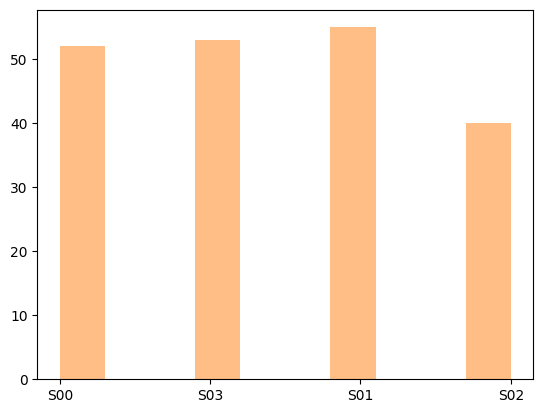

In [27]:
#generar el histograma de cuantos datos por sujeto se tienen
import matplotlib.pyplot as plt
plt.hist(df['sujeto'],color='tab:orange',alpha=0.5);

In [28]:
df.groupby(by='sujeto').get_group('S00').head(3)

,sujeto,genero,condicion,region,neuro,precisión
0,S00,F,control,amígdala,serotonina,0.969651
5,S00,M,experimental,cx prefrontal,serotonina,0.957921
11,S00,M,control,amígdala,dopamina,0.767624


In [30]:
grupos= df.groupby(by=['sujeto','condicion'])
grupos

In [31]:
llaves=grupos.groups.keys()
llaves

dict_keys([('S00', 'control'), ('S00', 'experimental'), ('S01', 'control'), ('S01', 'experimental'), ('S02', 'control'), ('S02', 'experimental'), ('S03', 'control'), ('S03', 'experimental')])

In [32]:
grupos.get_group(list(llaves)[0]).head(3)

,sujeto,genero,condicion,region,neuro,precisión
0,S00,F,control,amígdala,serotonina,0.969651
11,S00,M,control,amígdala,dopamina,0.767624
20,S00,F,control,hipocampo,serotonina,1.010741


In [34]:
control= df [df['sujeto' ]== 'S00' ]
sujeto0=control [control ['condicion' ]=='control' ]
sujeto0.head(3)

,sujeto,genero,condicion,region,neuro,precisión
0,S00,F,control,amígdala,serotonina,0.969651
11,S00,M,control,amígdala,dopamina,0.767624
20,S00,F,control,hipocampo,serotonina,1.010741


In [35]:
#funciones Lambda
def funcion(x):
    return x**2

funcion(5)

25

In [37]:
func_lambda= lambda x: x**2
func_lambda(5)

25

In [38]:
def funcion_str(string):
    return string[::-1]
funcion_str('ave maria')

'airam eva'

In [39]:
func_str= lambda string: string[::-1]
func_str('ave maria')

'airam eva'

In [40]:
def funcion(x,y):
    return x + y
funcion(5,8)

13

In [41]:
fun_lda=lambda x,y: x+y
fun_lda(5,8)

13

In [42]:
def funcion(a,b,c):
    return a+b , a-c
funcion(1,2,3)

(3, -2)

In [43]:
fun_lda= lambda a,b,c: (a+b, a-c)
fun_lda(1,2,3)

(3, -2)

In [45]:
def funcion(x):
    return x [0]
lista=[(1,8),(7,5),(12,-52),(2,0) ]
lista.sort(key=funcion,reverse=True)

In [46]:
lista

[(12, -52), (7, 5), (2, 0), (1, 8)]

In [47]:
lista.sort(key=lambda x: x[1],reverse=True)
lista

[(1, 8), (7, 5), (2, 0), (12, -52)]

In [48]:
df.head()

,sujeto,genero,condicion,region,neuro,precisión
0,S00,F,control,amígdala,serotonina,0.969651
1,S03,M,control,amígdala,dopamina,0.928145
2,S01,F,experimental,hipocampo,serotonina,0.875401
3,S03,F,control,amígdala,dopamina,0.938383
4,S02,M,control,cx prefrontal,dopamina,0.857887


In [ ]:
def funcion(string):
    return string